In [70]:
import requests
import pandas as pd
import json
from io import StringIO
from typing import Optional
import re
# URL de la API que proporciona el dataset en formato JSON
url = 'https://raw.githubusercontent.com/anyoneai/e-commerce-open-data-set/master/products.json'

# Realizar la solicitud GET a la API
response = requests.get(url)

In [71]:
# Verificar que la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Acceder al contenido de la respuesta, que es un JSON
    data = response.json()
    
    # Convertir el objeto JSON en una cadena JSON
    json_str = json.dumps(data)
    
    # Usar StringIO para convertir la cadena JSON en un objeto similar a un archivo
    json_data = StringIO(json_str)
    
    # Leer el objeto similar a un archivo con pd.read_json() y almacenarlo en 'df'
    df = pd.read_json(json_data)

    print('DataFrame creado con éxito:')
    display(df.head())  # Muestra las primeras filas del DataFrame para verificar
    df.info()
else:
    print(f'Error al hacer la solicitud: Código de estado {response.status_code}')

DataFrame creado con éxito:


,sku,name,type,price,upc,category,shipping,description,manufacturer,model,url,image
0,43900,Duracell - AAA Batteries (4-Pack),HardGood,5.49,41333424019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AAA...,Duracell,MN2400B4Z,http://www.bestbuy.com/site/duracell-aaa-batte...,http://img.bbystatic.com/BestBuy_US/images/pro...
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),HardGood,5.49,41333415017,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Long-lasting energy; DURALOCK Power Preserve t...,Duracell,MN1500B4Z,http://www.bestbuy.com/site/duracell-aa-1-5v-c...,http://img.bbystatic.com/BestBuy_US/images/pro...
2,127687,Duracell - AA Batteries (8-Pack),HardGood,7.49,41333825014,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AA ...,Duracell,MN1500B8Z,http://www.bestbuy.com/site/duracell-aa-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...
3,150115,Energizer - MAX Batteries AA (4-Pack),HardGood,4.99,39800011329,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,4-pack AA alkaline batteries; battery tester i...,Energizer,E91BP-4,http://www.bestbuy.com/site/energizer-max-batt...,http://img.bbystatic.com/BestBuy_US/images/pro...
4,185230,Duracell - C Batteries (4-Pack),HardGood,8.99,41333440019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; C s...,Duracell,MN1400R4Z,http://www.bestbuy.com/site/duracell-c-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...


<class 'pandas.core.frame.DataFrame'>
Index: 51646 entries, 0 to 51645
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           51646 non-null  int64  
 1   name          51645 non-null  object 
 2   type          51646 non-null  object 
 3   price         51646 non-null  float64
 4   upc           51646 non-null  int64  
 5   category      51646 non-null  object 
 6   shipping      51646 non-null  object 
 7   description   51646 non-null  object 
 8   manufacturer  51584 non-null  object 
 9   model         48783 non-null  object 
 10  url           51646 non-null  object 
 11  image         51646 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 5.1+ MB


In [72]:
# Get all the categories and subcategories into a new columns

df_copy = df.copy()

# Function to extract the first category
def extract_first_category(record):
    return record[0]['name']

# function to extract the second category
def extract_second_category(record):
    return record[1]['name'] if len(record) > 1 else None

# Function to extract the third category
def extract_third_category(record):
    return record[2]['name'] if len(record) > 2 else None

# Function to extract the fourth category
def extract_fourth_category(record):
    return record[3]['name'] if len(record) > 3 else None

# Function to extract the fifth category
def extract_fifth_category(record):
    return record[4]['name'] if len(record) > 4 else None

# Function to extract the sixth category
def extract_sixth_category(record):
    return record[5]['name'] if len(record) > 5 else None

# Function to extract the seventh category
def extract_seventh_category(record):
    return record[6]['name'] if len(record) > 6 else None

# Create the new columns
df_copy['parent_category'] = df_copy['category'].apply(extract_first_category)
df_copy['sub_category_1'] = df_copy['category'].apply(extract_second_category)
df_copy['sub_category_2'] = df_copy['category'].apply(extract_third_category)
df_copy['sub_category_3'] = df_copy['category'].apply(extract_fourth_category)
df_copy['sub_category_4'] = df_copy['category'].apply(extract_fifth_category)
df_copy['sub_category_5'] = df_copy['category'].apply(extract_sixth_category)
df_copy['sub_category_6'] = df_copy['category'].apply(extract_seventh_category)


C:\Users\gpg90\AppData\Local\Temp\ipykernel_2220\4099495022.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=non_null_percentage, x='category', y='percentage', palette=colors)
C:\Users\gpg90\AppData\Local\Temp\ipykernel_2220\4099495022.py:21: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  barplot = sns.barplot(data=non_null_percentage, x='category', y='percentage', palette=colors)


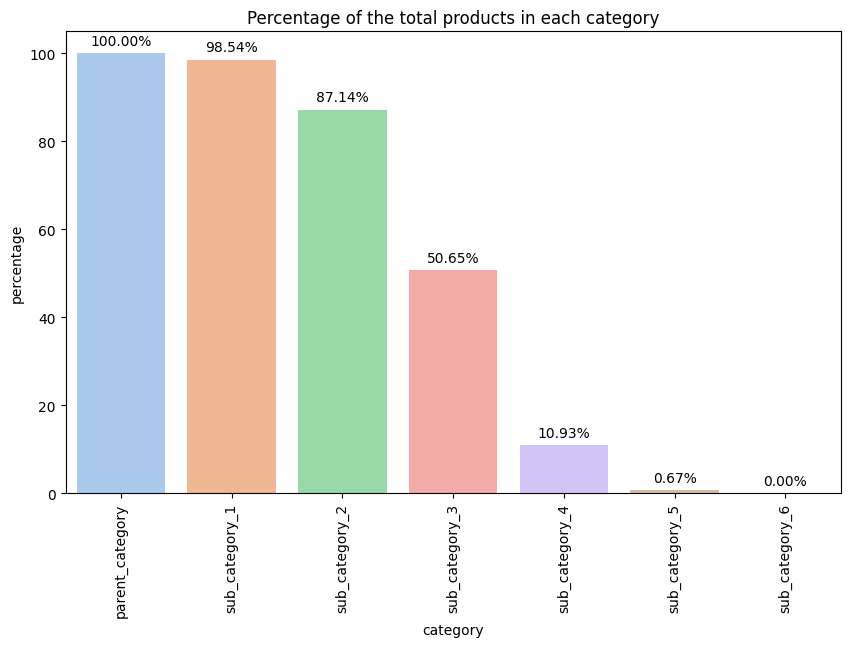

In [73]:
# Plot the new columns with the percatage of non null values
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new dataframe with the percentage of non null values, showing just "parent_category","sub_category_1",
# "sub_category_2","sub_category_3","sub_category_4","sub_category_5","sub_category_6"
non_null_percentage = pd.DataFrame(df_copy[['parent_category','sub_category_1','sub_category_2','sub_category_3',
                                            'sub_category_4','sub_category_5','sub_category_6']].notnull().mean()*100)

# Reset the index
non_null_percentage.reset_index(inplace=True)

# Rename the columns
non_null_percentage.columns = ['category','percentage']

# Create a color palette
colors = sns.color_palette('pastel')

# Plot the percentage of non null values
plt.figure(figsize=(10,6))
barplot = sns.barplot(data=non_null_percentage, x='category', y='percentage', palette=colors)
plt.xticks(rotation=90)
plt.title('Percentage of the total products in each category')

# Add values to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f') + '%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

We decided that, due to the fact that 99.33% of the records are within the first 5 categories, we will use these records to develop and train the model.

In [ ]:
# Drop sub_category_5 and sub_category_6
df_copy.drop(['sub_category_5','sub_category_6'], axis=1, inplace=True)

In [78]:
# print df_copy info
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51646 entries, 0 to 51645
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sku              51646 non-null  int64  
 1   name             51645 non-null  object 
 2   type             51646 non-null  object 
 3   price            51646 non-null  float64
 4   upc              51646 non-null  int64  
 5   category         51646 non-null  object 
 6   shipping         51646 non-null  object 
 7   description      51646 non-null  object 
 8   manufacturer     51584 non-null  object 
 9   model            48783 non-null  object 
 10  url              51646 non-null  object 
 11  image            51646 non-null  object 
 12  parent_category  51646 non-null  object 
 13  sub_category_1   50891 non-null  object 
 14  sub_category_2   45003 non-null  object 
 15  sub_category_3   26158 non-null  object 
 16  sub_category_4   5646 non-null   object 
dtypes: float64(1), in

Number of name categories per category:
parent_category: 62
sub_category_1: 175
sub_category_2: 622
sub_category_3: 761
sub_category_4: 196


C:\Users\gpg90\AppData\Local\Temp\ipykernel_2220\4017740489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=unique_values, x='category', y='unique_values', palette=colors)
C:\Users\gpg90\AppData\Local\Temp\ipykernel_2220\4017740489.py:22: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  barplot = sns.barplot(data=unique_values, x='category', y='unique_values', palette=colors)


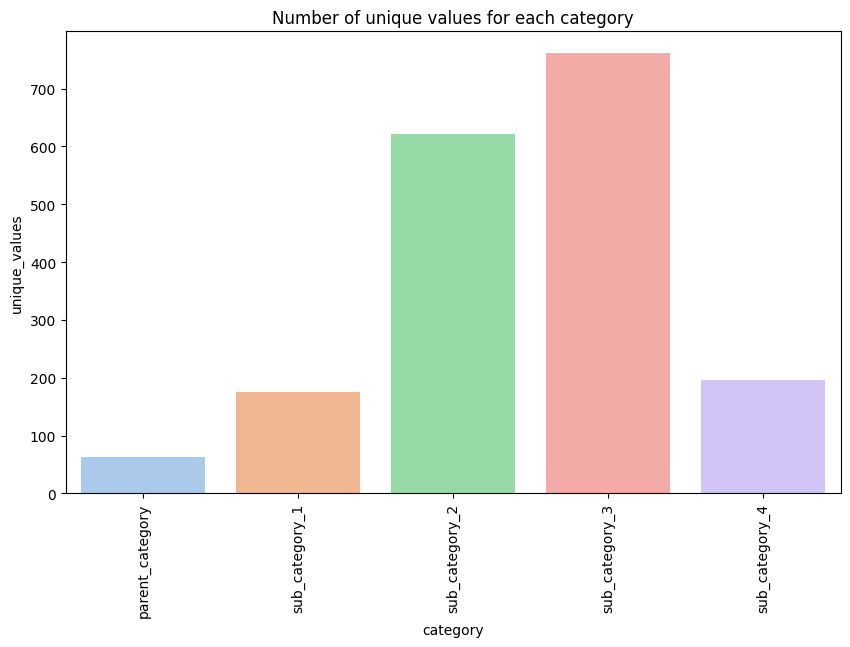

In [77]:
# Columns specified in your code snippet
columns_to_check = ['parent_category', 'sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4']

# Print the number of unique values for each specified column along with column name
print('Number of name categories per category:')
for column in columns_to_check:
    print(f'{column}: {df_copy[column].nunique()}')

# Plot a barplot with the number of unique values for each category

# Create a new dataframe with the number of unique values for each category
unique_values = pd.DataFrame(df_copy[columns_to_check].nunique())

# Reset the index
unique_values.reset_index(inplace=True)

# Rename the columns
unique_values.columns = ['category','unique_values']

# Plot the number of unique values for each category
plt.figure(figsize=(10,6))
barplot = sns.barplot(data=unique_values, x='category', y='unique_values', palette=colors)
plt.xticks(rotation=90)
plt.title('Number of unique values for each category')
plt.show()
